# Motion analysis of _Wayang Mitologi_

By Miguel Escobar Varela.

This is the companion code to Chapter 4 of my book _Theater as data: Computational Journeys into theater research_ (University of Michigan Press, 2021).

The book is openly accessible at https://doi.org/10.3998/mpub.11667458.

### *About Juypter and Python*

The following is written as a step-by-step tutorial for users who want to reproduce the results presented in my book.

This is an interactive Jupyter Notebook. For users not familiar with Python and Jupyter I recommend 
Allen Downey's excellent introductory materials at https://allendowney.github.io/ElementsOfDataScience/.

### 1 Importing the relevant libraries

First, we import [Pandas](https://pandas.pydata.org/) to read the data into dataframes and [Seaborn](https://seaborn.pydata.org/) for the visualizations.

In [1]:
import pandas as pd
import seaborn as sns

### 2 Importing the data

We will use the **6.1_mitologiImageDifference.csv** file included under the book's data at Fulcrum.

This file includes the number of pixels in each difference image of _Wayang Mitologi_. The video was processed by Gea Oswah Fatah Parikesit using Scilab and the Scilab Image and Video Processing Toolbox (SIVP). In the video recording of Wayang Mitologi, the noise level is10 greyvalues, so we only consider pixels with greyvalues higher than 10 as the non-static pixels. This was checked by recording two dark images and measuring the greyvalues of the supposedly dark pixels. The video is 69 minutes long. We obtained 1000 images per minute, and then sampled one out of each 150 difference images, which corresponds to ~ 0.1 min. The file indicates how each of the 460 difference images corresponds to the 69,652 frame numbers and the 69 minutes.

Full details of the context of this research process are availagle in Chapter 5 of _Theater as Data_.

The video of _Wayang Mitologi_ is freely available at http://cwa-web.org/en/WayangMitologi.

Catur Kuncoro ([2012] 2016), _Wayang Mitologi_ [Mythological Wayang], translation and notes by Miguel Escobar Varela and Indraswari Kusumaningtyas. Singapore: Contemporary Wayang Archive.

With the following code, we will read the CSV file into a data frame called **df**. The syntax assumes that the CSV is under a directory called **data/ch6**.

In [13]:
df = pd.read_csv("../../data/ch6/6_1_mitologiImageDifference.csv")

To get a sense of the data, we can use the **head()** function to display the first 5 rows of the dataframe.

In [14]:
df.head()

,Time,Image difference number,Frame number,Non-identical pixels,Scene Number,Scene Type
0,00:00:00,0,0,0.000000,1,frame
1,00:00:09,1,150,343.666667,1,frame
2,00:00:18,2,300,772.333333,1,frame
3,00:00:27,3,450,62.333333,1,frame
4,00:00:36,4,600,220.000000,1,frame


### 3 Visualization

Using the **lineplot** function from Seaborn, we can visualize the number of Non-identical pixels as a function of the "Frame number".

<Axes: xlabel='Frame number', ylabel='Non-identical pixels'>

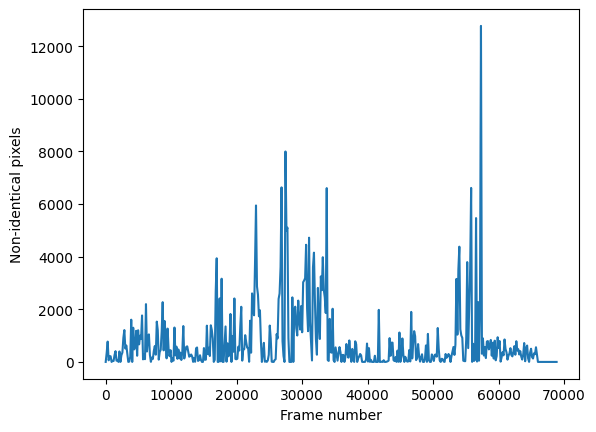

In [4]:
sns.lineplot(y="Non-identical pixels",x="Frame number",data=df)

As described in Chapter 6, _Wayang Mitologi_ includes different types of scenes. To get a sense of how the amount of motion varies accross these different scenes, we can create a scatterplot that compares the scenes' motion in terms of avarage and standard deviation. 

We only need the columns "Scene Number", "Scene Type" and "Non-identical pixels" for this purpose, and we can remove all other columns with the following instruction.

In [5]:
df.drop(["Time","Image difference number","Frame number"], axis=1, inplace=True)

Using **groupby()** and **mean()** we can calculate the arithmetic mean of "Non-identical pixels" for each scene, and assign these results to a new dataframe that we will call **mean**.

In [6]:
mean = df.groupby(['Scene Number','Scene Type']).mean()

The following instruciton displays the result.

In [7]:
mean

,,Non-identical pixels
Scene Number,Scene Type,
1,frame,279.653846
2,normal,734.476190
3,normal,586.328283
4,normal,692.026667
5,normal,1285.373333
6,narrative,1868.400000
7,comic,747.296078
8,narrative,1989.706667
9,frame,292.235556


The name of the column with the arithmetic mean values is confusing, so we will rename it to "mean".

In [8]:
mean.rename(columns={"Non-identical pixels": "mean"},inplace=True)

Then we repeat the same process for standard deviation, using the function **std()**.

In [9]:
std = df.groupby(['Scene Number','Scene Type']).std()
std.rename(columns={"Non-identical pixels": "std"},inplace=True)

We now have two dataframes, one that includes the arithmetic mean for each scene and one that includes the standard deviation for each scene. To combine them, we use the function **concat()** and assign the result to a new dataframe, which we will call **mean_and_std**.

In [10]:
mean_and_std = pd.concat([mean,std], axis=1)

We need to reset the index so that we can use "Scene Type" as a variable to determine the hues of the points in the scatterplot.

In [11]:
mean_and_std.reset_index("Scene Type",inplace=True)

Finally, we can use the **scatterplot()** function from Seaborn to compare each scene in terms of both arithmetic mean and standard deviation. To see how the type of scene affects these values, we set the hue parameter to "Scene Type".

<Axes: xlabel='mean', ylabel='std'>

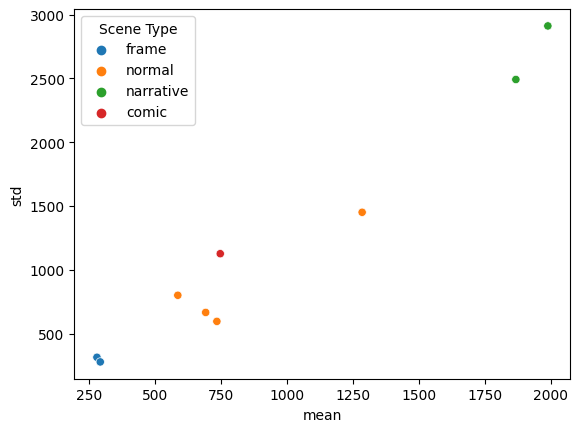

In [12]:
sns.scatterplot(x="mean", y="std", hue="Scene Type", data=mean_and_std)

**NOTE:** The image in the book was reformatted with other symbols, so that it would be interpretable as a black and white image.